---

## 🎯 **Goal**

You're trying to predict whether a **T-shirt will be a top seller** based on its **price**.

---

## 🧠 Step 1: Logistic Regression as a Simple Neuron

You already know the logistic regression formula:

$$
a = \frac{1}{1 + e^{-(wx + b)}}
$$

* **Input**: $x$ = price of the T-shirt
* **Weights**: $w$ = learned parameter
* **Bias**: $b$ = learned constant
* **Output**: $a \in [0,1]$, interpreted as probability (e.g. 0.9 = high chance of top seller)

This formula can now be thought of as a **simple neuron**.

---

## 🧩 What Is a Neuron?

Think of a **neuron** as a **tiny computer** that:

* Takes **input(s)** → like the price
* Applies a **linear transformation** → $wx + b$
* Passes it through a **non-linear function** (sigmoid in this case)
* **Outputs a number** (activation $a$) → probability of being a top seller
* Denote **a** as the output of sigmoid function
* **a** is called **activation**

This is just like a **biological neuron**: it collects inputs, computes, and fires signals downstream.

---

## 🔁 Terminology Switch

* **a (activation)**: Replaces “f(x)” from earlier. It’s the neuron's output.
* **Activation Function**: Sigmoid in this example; could also be ReLU, tanh, etc.
* **Neuron Output = Activation = a**

---

## 🧮 Example: Why Build Networks?

* A single neuron can only model **simple** relationships (like linear or sigmoid-shaped).
* But by combining neurons in **layers**, you can model **complex patterns** (like price thresholds, seasonal behaviors, trends).
* For example: price around \$25 might be good for tops, but not for hoodies—this logic can be learned automatically.

---

## ✅ Summary

* Logistic regression is **equivalent to a simple neuron**.
* A **neural network** is just a **collection of neurons**, organized in **layers**, passing activations forward.
* **Deep learning** = neural networks with **many layers** and neurons.
* Each neuron:

  $$
  a = \sigma(wx + b)
  $$

  Where $\sigma$ is an activation function (sigmoid in your example).

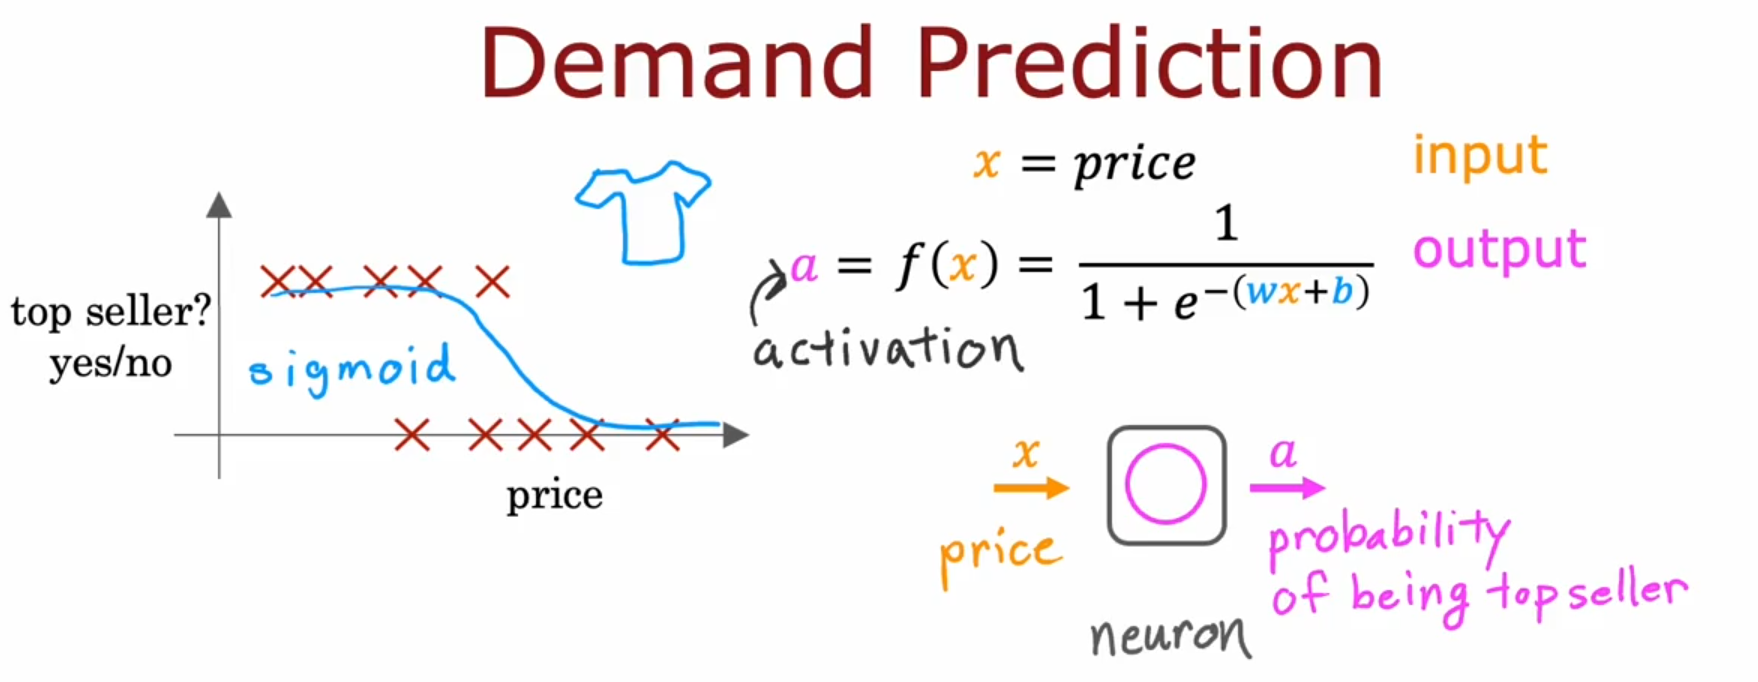

---

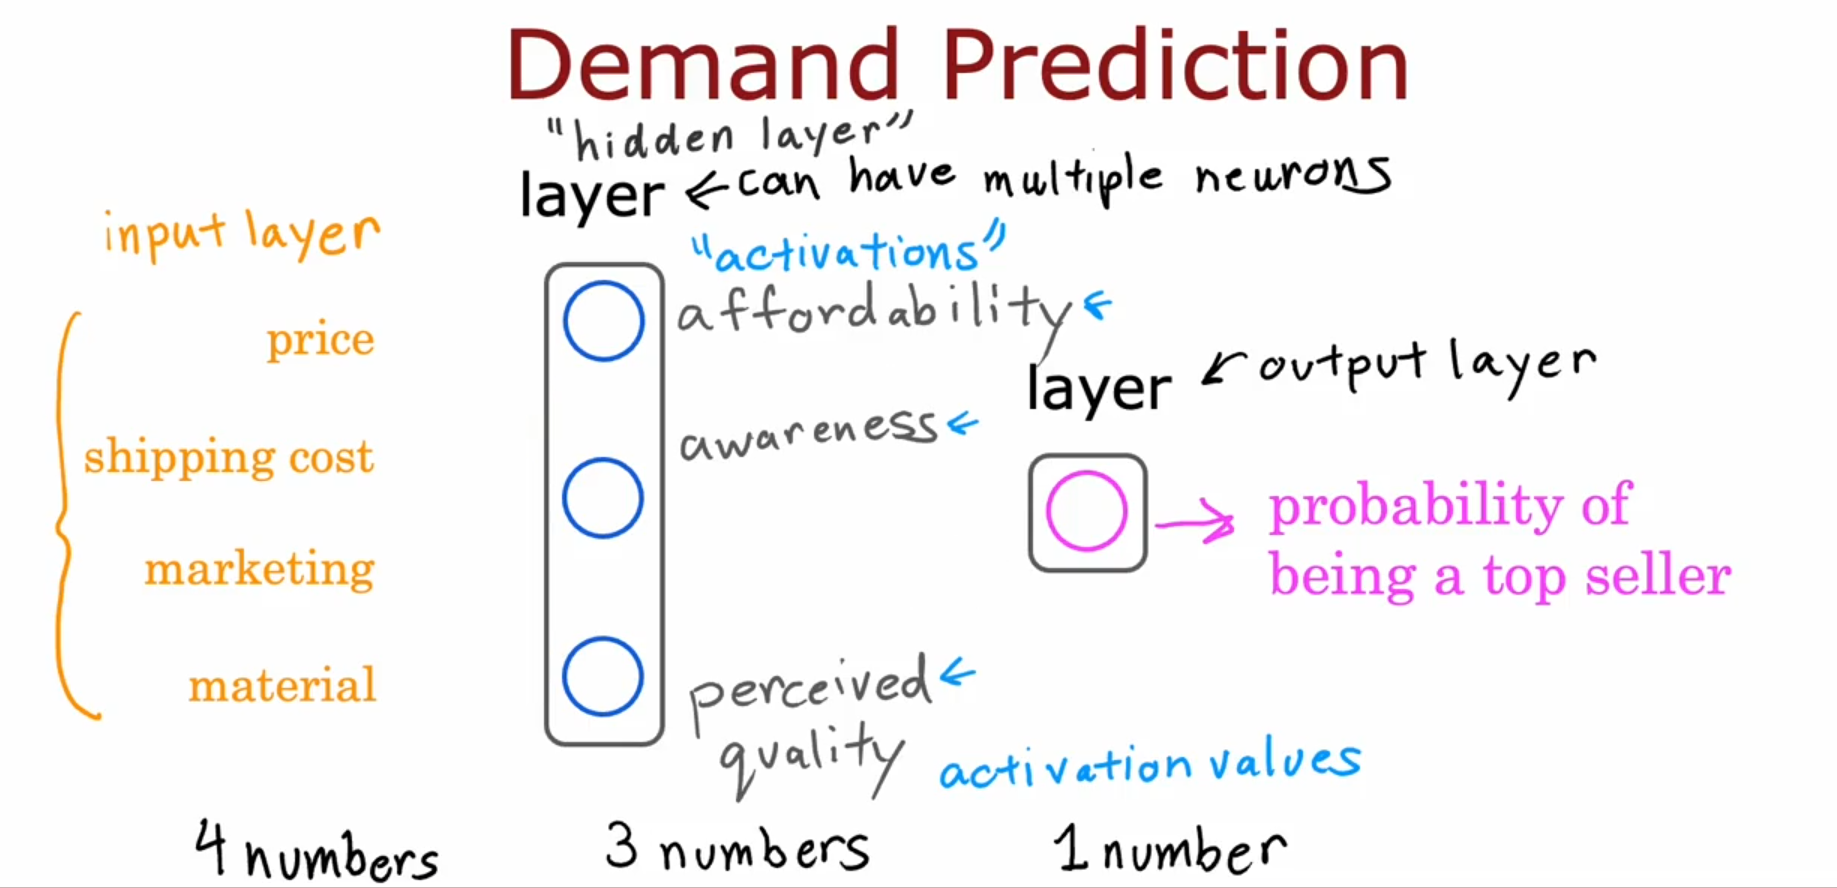

---

## 🧠 The Complex Demand Prediction Example

You want to predict whether a **T-shirt is a top seller**, based on **4 features**:

1. **Price**
2. **Shipping cost**
3. **Marketing amount**
4. **Material quality**

Each T-shirt can now be represented as a **vector** of these 4 input features:

$$
\mathbf{x} = \begin{bmatrix} \text{price} \\ \text{shipping} \\ \text{marketing} \\ \text{quality} \end{bmatrix}
$$

---

## 🧩 Step 1: Feature Engineering with Neurons

Before predicting whether a T-shirt is a top seller, the neural network first **extracts intermediate concepts** using artificial neurons:

### 🔷 Hidden Layer (3 Neurons):

| Neuron                | Inputs                  | Meaning                                                         |
| --------------------- | ----------------------- | --------------------------------------------------------------- |
| **Affordability**     | price, shipping cost    | Is the T-shirt affordable overall?                              |
| **Awareness**         | marketing               | Do people know about the T-shirt?                               |
| **Perceived Quality** | price, material quality | Do people *think* it’s high-quality? (possibly biased by price) |

Each of these neurons uses a logistic regression-style formula:

$$
a^{[1]}_i = \sigma(w_i^T x + b_i) \quad \text{(for } i = 1, 2, 3\text{)}
$$

Where:

* $\sigma$ is the sigmoid activation
* $x$ is the input vector of 4 features
* $w_i$ and $b_i$ are weights and bias for each neuron

These outputs (activations) are:

$$
a^{[1]} = \begin{bmatrix} \text{affordability} \\ \text{awareness} \\ \text{perceived quality} \end{bmatrix}
$$

---

## 🟠 Step 2: Final Prediction (Output Layer)

This single **output neuron** takes those 3 activations and computes:

$$
a^{[2]} = \sigma(w^{[2]^T} a^{[1]} + b^{[2]})
$$

Where $a^{[2]} \in [0,1]$ is the **predicted probability** that the T-shirt is a **top seller**.

---

## 🧱 Step 3: What Is a Neural Network?

Now you're seeing the standard **3-layer neural network structure**:

1. **Input Layer**: Just the raw input vector $x \in \mathbb{R}^4$
2. **Hidden Layer (Layer 1)**: Three neurons computing intermediate concepts
3. **Output Layer (Layer 2)**: One neuron predicting the final outcome

### Diagram (simplified):

```
Input layer (x):
[price, shipping, marketing, quality]
       ↓       ↓        ↓         ↓
    Fully connected (each neuron sees all 4 features)
       ↓       ↓        ↓         ↓

Hidden layer (3 neurons):
[affordability, awareness, perceived_quality]
           ↓    ↓    ↓
        Fully connected

Output layer (1 neuron):
[top seller probability]
```

---

## 💡 Practical Implementation Note

Instead of **manually deciding** which inputs each neuron uses (e.g., affordability only sees price + shipping), in real neural networks:

* **All neurons in a layer are fully connected** to the previous layer.
* Neurons **learn to ignore irrelevant features** by adjusting their weights during training (e.g., a neuron may learn a weight close to 0 for marketing if it’s irrelevant for affordability).

So we simplify our architecture:

* Every neuron in **hidden layer** gets **all 4 input features**.
* Every neuron in **output layer** gets **all 3 outputs from hidden layer**.

---

## 🧮 Vectorized View

This is how a neural network processes data using matrix operations:

1. **Input layer** (feature vector):

$$
x = \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}
$$

2. **Hidden layer** (3 neurons):

$$
z^{[1]} = W^{[1]}x + b^{[1]}, \quad a^{[1]} = \sigma(z^{[1]})
$$

Where:

* $W^{[1]} \in \mathbb{R}^{3 \times 4}$
* $b^{[1]} \in \mathbb{R}^3$
* $a^{[1]} \in \mathbb{R}^3$

3. **Output layer**:

$$
z^{[2]} = W^{[2]}a^{[1]} + b^{[2]}, \quad a^{[2]} = \sigma(z^{[2]})
$$

Where:

* $W^{[2]} \in \mathbb{R}^{1 \times 3}$
* $b^{[2]} \in \mathbb{R}$
* $a^{[2]} \in \mathbb{R}$ (the output probability)

---

## ✅ Summary

* You built a **multi-layer neural network**: inputs → hidden layer → output.
* The hidden layer extracts **intermediate concepts** (activations).
* Every neuron is **fully connected** to the previous layer.
* Inputs are represented as a **vector** $x$, and the whole network is trained to **learn the best weights**.

---

---

## 🧠 Neural Networks: Core Concepts

### 🏷️ **1. Layers in a Neural Network**

* **Input Layer**: Receives the raw input features (e.g., price, shipping cost, marketing, material quality).
* **Hidden Layer(s)**: Computes intermediate features (e.g., affordability, awareness, perceived quality).

  * Called **“hidden”** because their values are not observed in training data.
* **Output Layer**: Outputs the final prediction (e.g., probability of being a top-selling T-shirt).

---

### 🔢 **2. Structure and Flow**

* Inputs are passed forward layer-by-layer.
* Each **neuron** (unit) in a layer computes a weighted sum of its inputs, applies an activation function (like sigmoid), and passes it on.
* Output of one layer becomes the input to the next.
* Example:
  Input → Hidden Layer (3 neurons) → Output Layer (1 neuron)
  Four input features → Three intermediate activations → One prediction

---

### 🧮 **3. Feature Learning**

* Instead of manually designing features (like price + shipping = total cost),
* Neural networks **learn** better features during training.

  * This makes neural networks very powerful compared to manual feature engineering or plain logistic regression.

---

### 🔁 **4. Fully Connected Neurons**

* In practice, **each neuron receives input from all neurons in the previous layer**.
* Even if a neuron doesn’t need all inputs, it can learn to **ignore** irrelevant ones by assigning small weights during training.

---

### 🧰 **5. Terminology Recap**

| Term                            | Meaning                                         |
| ------------------------------- | ----------------------------------------------- |
| **Neuron** / Unit               | A logistic regression model (computes a value)  |
| **Activation**                  | Output value of a neuron                        |
| **Hidden Layer**                | Intermediate layer, not seen in training labels |
| **Output Layer**                | Final layer that gives prediction               |
| **Input Layer**                 | Raw feature inputs                              |
| **Architecture**                | Number of layers and neurons in each            |
| **Multilayer Perceptron (MLP)** | Neural network with at least one hidden layer   |

---

### 🔄 **6. Deep Neural Networks**

* Networks with **multiple hidden layers** are called **deep networks**.
* They can learn very complex features and patterns.

Example:

```plaintext
Input Layer → Hidden Layer 1 (3 units) → Hidden Layer 2 (2 units) → Output Layer (1 unit)
```

---

## 🧠 Analogy: Neural Network as Enhanced Logistic Regression

* **Logistic Regression**: Predicts using raw features.
* **Neural Network**: Adds layers that **learn better features automatically** → makes more accurate predictions.

---

### ✅ Summary

A **neural network**:

* Inputs a vector of features
* Uses **layers of neurons** to compute intermediate activations
* Learns its own features
* Outputs a prediction
* Can have **one or more hidden layers**
* Is trained by adjusting weights to reduce prediction error

---